In [1]:
# ANOVA , F-test

# ejemplo plantas  H0:similares , H1:que son diferentes
import pandas as pd
from scipy import stats

In [2]:
df=pd.read_csv('data/PlantGrowth.csv')
df.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [3]:
df.group.unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [4]:
df_anova=df[['weight', 'group']].reset_index()
grupo=df.group.unique()

In [5]:
data={g: df_anova.weight[df_anova.group==g] for g in grupo}
data

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64, 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64, 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [6]:
f_score, p_value=stats.f_oneway(data['ctrl'], data['trt1'], data['trt2'])

In [7]:
p_value

0.0159099583256229

In [8]:
# Ejemplo ciudades
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import linregress
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f

In [9]:
rate=pd.read_csv('data/rate_by_city.csv')
rate.head()

,Rate,City
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1


In [10]:
rate['city_count']=rate.groupby('City').cumcount()
rate_pivot=rate.pivot(columns='City', values='Rate', index='city_count')
rate_pivot

City,1,2,3,4,5,6
city_count,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00
5,13.00,12.40,13.25,12.97,13.25,12.00
6,13.00,12.30,13.00,12.50,13.00,12.00
7,12.75,11.90,12.50,12.25,12.50,11.90
8,12.50,11.90,12.50,11.89,12.45,11.90


In [11]:
f_oneway(*[rate_pivot[i] for i in range(1,7)])

F_onewayResult(statistic=4.8293848737024, pvalue=0.001174551414504048)

In [12]:
# a mano F-test
data=np.array([[1,2,3], [4,5,6], [7,8,9]]).T
data

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [13]:
m=data.shape[1]
n=data.shape[0]

In [14]:
media=data.mean()
col_medias=data.mean(axis=0)
s_c_entre_grupos=(((col_medias-media)**2)*n).sum()
dof_sceg=m-1
s_c_grupo=((data-col_medias)**2).sum()
dof_scg=m*(n-1)


In [15]:
f_test=(s_c_entre_grupos/dof_sceg)/(s_c_grupo/dof_scg)
f_test

27.0

In [16]:
f_oneway(data[:,0], data[:,1], data[:,2])

F_onewayResult(statistic=27.0, pvalue=0.0010000000000000002)

In [17]:
# con statsmodels
formula='Rate ~ C(City)'
modelo=ols(formula=formula, data=rate).fit()

In [18]:
anova_table=sm.stats.anova_lm(modelo, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(City),5.0,10.945667,2.189133,4.829385,0.001175
Residual,48.0,21.758133,0.453294,NaN,NaN


In [19]:
# ANOVA two-way

df=pd.read_csv('data/crop_yield.csv')
df.head()

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In [20]:
modelo=ols('Yield ~ C(Fert)*C(Water)', df).fit()

In [21]:
modelo.fvalue

4.1124444444444475

In [22]:
modelo.f_pvalue

0.024302580837416664

In [23]:
res=sm.stats.anova_lm(modelo, typ=2)
res

,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.766000,0.028847
C(Water),63.368,1.0,5.280667,0.035386
C(Fert):C(Water),15.488,1.0,1.290667,0.272656
Residual,192.000,16.0,NaN,NaN


In [24]:
# MANOVA (multivariante)
from statsmodels.multivariate.manova import MANOVA

In [25]:
df=pd.read_csv('data/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [26]:
df.columns=df.columns.str.replace('.', '_')

In [27]:
manova=MANOVA.from_formula('sepal_width+sepal_length+petal_width+petal_length ~ variety', data=df)

In [28]:
print (manova.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2086.7720 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2086.7720 0.0000
 Hotelling-Lawley trace 57.9659 4.0000 144.0000 2086.7720 0.0000
    Roy's greatest root 57.9659 4.0000 144.0000 2086.7720 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        variety          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.00

In [29]:
# ji-dos, chi-cuadrado
# para una sola poblacion que tenga dos variables categoricas
# ¿existe asociacion entre ellas?  H0: NO , H1: SI

from scipy.stats import chi2
from scipy.stats import chi2_contingency
df=pd.read_csv('data/chi-test.csv')
df.head()

,Gender,Like Shopping?
0,Male,No
1,Female,Yes
2,Male,Yes
3,Female,Yes
4,Female,Yes


In [30]:
contin_table=pd.crosstab(df.Gender, df['Like Shopping?'])
contin_table

Like Shopping?,No,Yes
Gender,,
Female,2,3
Male,2,2


In [31]:
chi_2, p_value, dof, ex = chi2_contingency(contin_table)

In [32]:
p_value

0.7076604666545525

In [34]:
# ji-dos a mano

chi_square=[(f-e)**2./e for f,e in zip(contin_table.values, ex)]
chi_statistic=sum(chi_square)
p_value=1-chi2.cdf(x=chi_statistic, df=dof)
p_value  # no hay relacion 

array([0.82306327, 0.84148058])

In [43]:
# Regresion lineal
auto=pd.read_csv('data/auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [44]:
linreg=linregress(auto.acceleration, auto.mpg)

In [45]:
linreg

LinregressResult(slope=1.1912045293502274, intercept=4.9697930042539085, rvalue=0.4202889121016507, pvalue=1.8230915350787203e-18, stderr=0.12923643283101396)

In [47]:
linreg[2]**2

0.17664276963558906

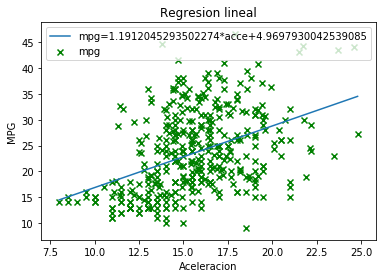

In [49]:
# plot
x=np.linspace(auto.acceleration.min(), auto.acceleration.max(), 50)
y=linreg[1]+linreg[0]*x
plt.plot(x, y, label='mpg={}*acce+{}'.format(linreg[0], linreg[1]))
plt.scatter(auto.acceleration, auto.mpg, marker='x', c='g', label='mpg')
plt.title('Regresion lineal')
plt.xlabel('Aceleracion')
plt.ylabel('MPG')
plt.legend()
plt.show();

In [51]:
# linreg con statsmodels
import warnings
warnings.simplefilter('ignore')

x=sm.add_constant(auto.acceleration)
y=auto.mpg
modelo=sm.OLS(y, x).fit()

In [52]:
pred=modelo.predict(x)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.82e-18
Time:                        10:56:18   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432      0.015       0.953       8.987
acceleration     1.1912      0.129      9.217      0.000       0.937       1.445
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.214
Skew:                           0.497   Prob(JB):                     0.000111
Kurtosis:                       2.670   Cond. No.                         91.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# varias variables

x=sm.add_constant(auto[[
    'acceleration',
    'cylinders',
    'weight',
    'horse_power',
   # 'model_year',
    'displacement'
]].apply(lambda x: x.fillna(x.mean()))

)

y=auto.mpg

In [64]:
modelo=sm.OLS(y, x).fit()
pred=modelo.predict(x)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     187.5
Date:                Wed, 20 Nov 2019   Prob (F-statistic):          1.40e-101
Time:                        11:04:24   Log-Likelihood:                -1139.6
No. Observations:                 398   AIC:                             2291.
Df Residuals:                     392   BIC:                             2315.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.8650      2.635     17.405      0.000      40.684      51.046
acceleration    -0.0070      0.123     -0.057      0.955      -0.248       0.234
cylinders       -0.3587      0.410     -0.875      0.382      -1.165       0.447
weight          -0.0054      0.001     -6.654      0.000      -0.007      -0.004
horse_power     -0.0390      0.016     -2.422      0.016      -0.071      -0.007
displacement    -0.0014      0.009     -0.153      0.879      -0.019       0.017
==============================================================================
Omnibus:                       38.520   Durbin-Watson:                   0.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.729
Skew:                           0.708   Prob(JB):                     5.85e-12
Kurtosis:                       4.057   Cond. No.                     3.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
modelo.params

const           45.864960
acceleration    -0.007004
cylinders       -0.358711
weight          -0.005366
horse_power     -0.039028
displacement    -0.001392
dtype: float64

In [66]:
# version sklearn

!pip3 install scikit-learn

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [72]:
auto=auto.dropna()
x=auto[[
    'acceleration',
    'cylinders',
    'weight',
    'horse_power',
    'model_year',
    'displacement'
]]

y=auto.mpg

In [76]:
modelo=LinearRegression(fit_intercept=True).fit(x,y)

In [77]:
pred=modelo.predict(x)

In [78]:
print (r2_score(y, pred))
print (modelo.coef_)
print (modelo.intercept_)

0.8092552890383932
[ 8.52732469e-02 -3.29859089e-01 -6.79461791e-03 -3.91355574e-04
  7.53367180e-01  7.67843024e-03]
-14.535250480506473


In [79]:
# A/B testing bayesiano


from scipy.stats import beta
import numpy as np
from math import lgamma
from numba import jit


@jit
def h(a, b, c, d):
    num = lgamma(a + c) + lgamma(b + d) + lgamma(a + b) + lgamma(c + d)
    den = lgamma(a) + lgamma(b) + lgamma(c) + lgamma(d) + lgamma(a + b + c + d)
    return np.exp(num - den)

@jit
def g0(a, b, c):    
    return np.exp(lgamma(a + b) + lgamma(a + c) - (lgamma(a + b + c) + lgamma(a)))

@jit
def hiter(a, b, c, d):
    while d > 1:
        d -= 1
        yield h(a, b, c, d) / d

def g(a, b, c, d):
    return g0(a, b, c) + sum(hiter(a, b, c, d))

def calc_prob_between(beta1, beta2):
    return g(beta1.args[0], beta1.args[1], beta2.args[0], beta2.args[1])

In [80]:
# los datos son conocidos: impresiones, conversiones, control y test
imps_ctrl, convs_ctrl= 16500, 30
imps_test, convs_test= 17000, 50

CR_ctrl=convs_ctrl/imps_ctrl
CR_test=convs_test/imps_test

print ('Tasas', CR_ctrl, CR_test)
print ((CR_test-CR_ctrl)/CR_ctrl)

Tasas 0.0018181818181818182 0.0029411764705882353
0.6176470588235294


In [81]:
# se crean funciones beta
# aprioris

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_C=beta(a_C, b_C)  # control
beta_T=beta(a_T, b_T)  # test

In [82]:
lift=(beta_T.mean()-beta_C.mean())/beta_C.mean()  # salto

In [83]:
prob=calc_prob_between(beta_T, beta_C)

In [85]:
print ('El test aumenta la tasa de conversion en un {:2.2f}% con una probabilidad del {:2.2f}%'.format(lift*100, prob*100))

El test aumenta la tasa de conversion en un 59.68% con una probabilidad del 98.21%


In [86]:
import matplotlib.pyplot as plt
def pico(a, b):
    return (a-1)/(a+b-2)

In [94]:
def plot(betas, names, linf=0, lsup=0.01):
    x=np.linspace(linf, lsup, 100)
    for f, n in zip(betas, names):
        y=f.pdf(x)
        y_pico=pico(f.args[0], f.args[1])
        y_var=f.var()
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(n, y_pico, y_var))
        plt.yticks([])
    plt.legend()
    plt.show();

0.0018181818181818182 0.0029411764705882353


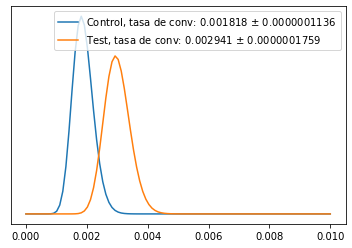

In [95]:
print (CR_ctrl, CR_test)
plot([beta_C, beta_T], ['Control', 'Test'])

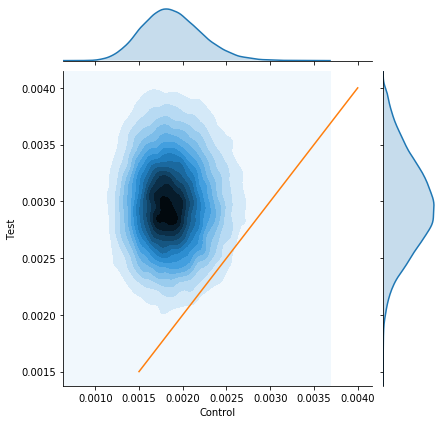

In [96]:
import seaborn as sns

val_C=np.random.beta(a_C, b_C, 50000)
val_T=np.random.beta(a_T, b_T, 50000)

vals=np.vstack([val_C, val_T]).T
limit=0.004

df=pd.DataFrame(vals, columns=['Control','Test'])
df=df[df.Control<limit]
df=df[df.Test<limit]


g=sns.jointplot(x=df.Control, y=df.Test, kind='kde', n_levels=15)
g.ax_joint.plot([0.0015, limit], [0.0015, limit])
plt.show();

In [97]:
# ¿prob de que el test sea superior a 0.003 (CR)?

from mpmath import betainc
p=betainc(a_T, b_T, 0.003, 1, regularized=True)
p

mpf('0.48112566853812544')